In [9]:
# FER2013 dataset
import os
from collections import Counter
from PIL import Image

# Define dataset directory
dataset_dir = r"C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train"

# Function to get image file paths and their corresponding classes
def get_image_classes(dataset_dir):
    image_classes = []
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.jpg', '.png')):
                label = os.path.basename(root)  # Assuming folder name is the class label
                image_classes.append(label)
    return image_classes

# Count images per class
image_classes = get_image_classes(dataset_dir)
class_distribution = Counter(image_classes)
print("Class distribution:", class_distribution)

# Check image dimensions
image_dimensions = []
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.endswith(('.jpg', '.png')):
            img = Image.open(os.path.join(root, file))
            image_dimensions.append(img.size)

# Print some statistics on image dimensions
print("Image dimensions:", Counter(image_dimensions))


Class distribution: Counter({'happy': 700, 'surprise': 515, 'neutral': 506, 'sad': 491, 'fear': 482, 'disgust': 479, 'angry': 474})
Image dimensions: Counter({(48, 48): 3647})


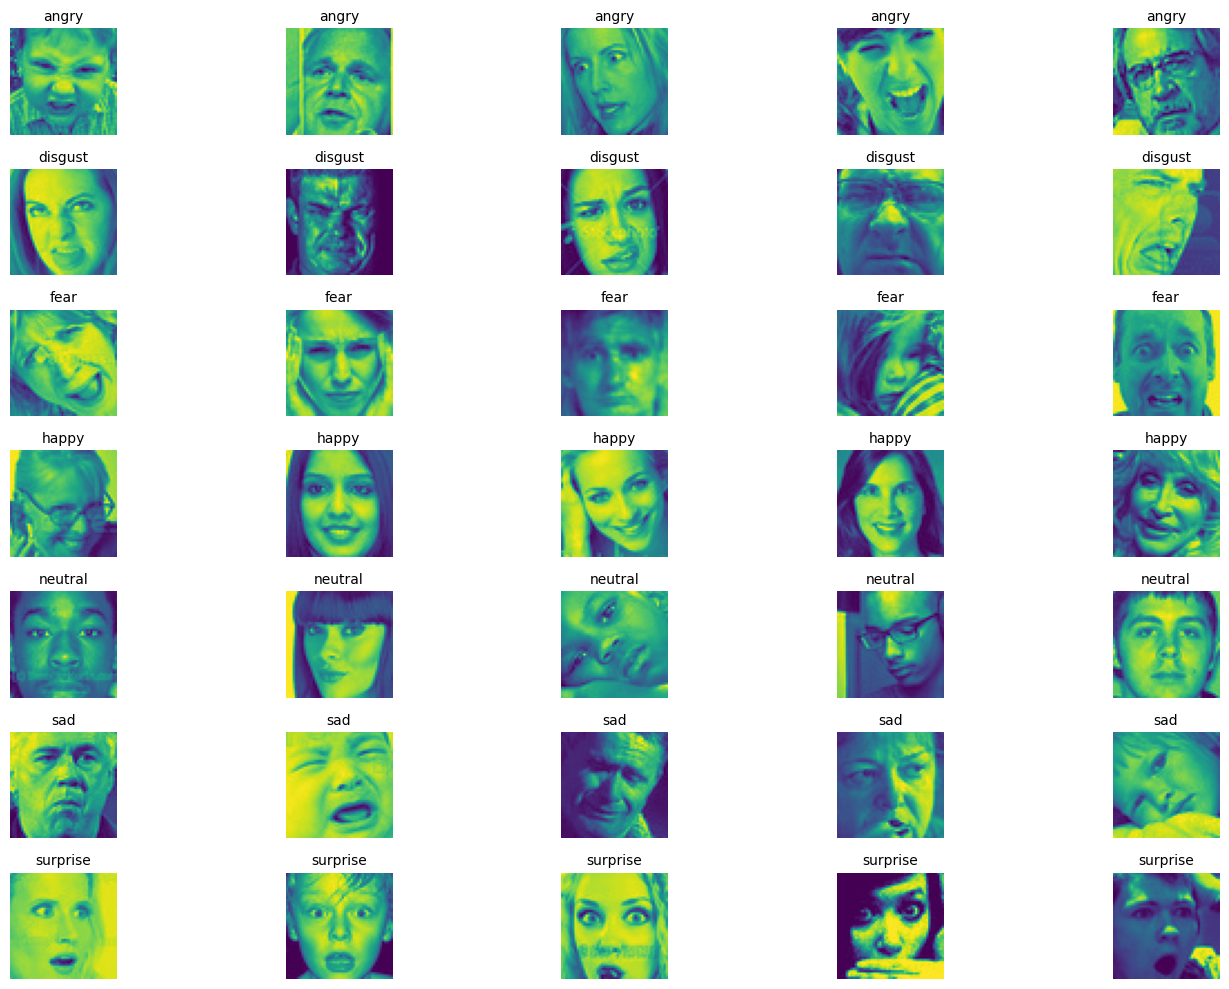

In [10]:
import matplotlib.pyplot as plt
import random

# Function to plot random images from each class
def plot_random_images(dataset_dir, class_distribution, n_images=5):
    plt.figure(figsize=(15, 10))
    for i, (emotion_class, _) in enumerate(class_distribution.items()):
        class_dir = os.path.join(dataset_dir, emotion_class)
        images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith(('.jpg', '.png'))]
        for j in range(n_images):
            img_path = random.choice(images)
            img = Image.open(img_path)
            plt.subplot(len(class_distribution), n_images, i * n_images + j + 1)
            plt.imshow(img)
            plt.axis('off')
            # Display the emotion class label together with the image
            plt.title(emotion_class, fontsize=10)
    plt.tight_layout()
    plt.show()

# Example usage
plot_random_images(dataset_dir, class_distribution)

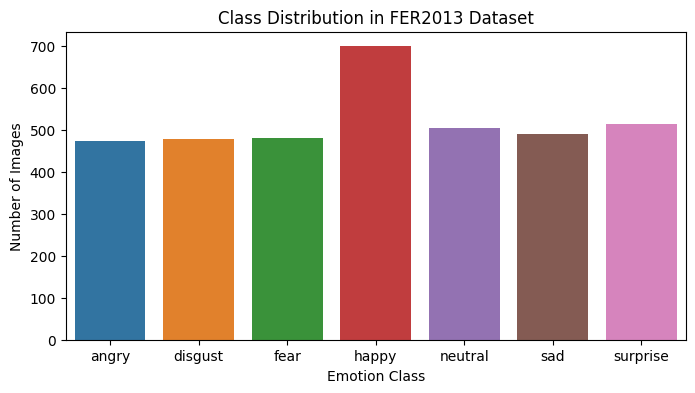

Class distribution: Counter({'happy': 700, 'surprise': 515, 'neutral': 506, 'sad': 491, 'fear': 482, 'disgust': 479, 'angry': 474})


In [11]:
import seaborn as sns

# Plotting class distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title('Class Distribution in FER2013 Dataset')
plt.xlabel('Emotion Class')
plt.ylabel('Number of Images')
plt.show()

print("Class distribution:", class_distribution)

Class distribution: Counter({'happy': 700, 'surprise': 515, 'neutral': 506, 'sad': 491, 'fear': 482, 'disgust': 479, 'angry': 474})


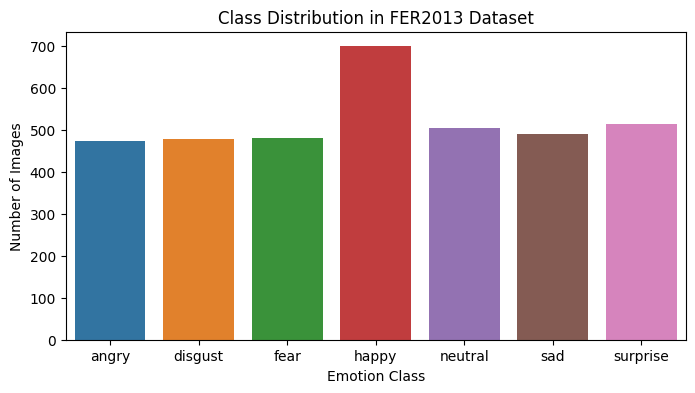

Image dimensions: Counter({(48, 48): 3647})


In [15]:
# FER2013 dataset after cleaned
import os
from collections import Counter
from PIL import Image

# Define dataset directory
dataset_dir = r"C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train"

# Function to get image file paths and their corresponding classes
def get_image_classes(dataset_dir):
    image_classes = []
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.jpg', '.png')):
                label = os.path.basename(root)  # Assuming folder name is the class label
                image_classes.append(label)
    return image_classes

# Count images per class
image_classes = get_image_classes(dataset_dir)
class_distribution = Counter(image_classes)
print("Class distribution:", class_distribution)

# Plotting class distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title('Class Distribution in FER2013 Dataset')
plt.xlabel('Emotion Class')
plt.ylabel('Number of Images')
plt.show()

# Check image dimensions
image_dimensions = []
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.endswith(('.jpg', '.png')):
            img = Image.open(os.path.join(root, file))
            image_dimensions.append(img.size)

# Print some statistics on image dimensions
print("Image dimensions:", Counter(image_dimensions))


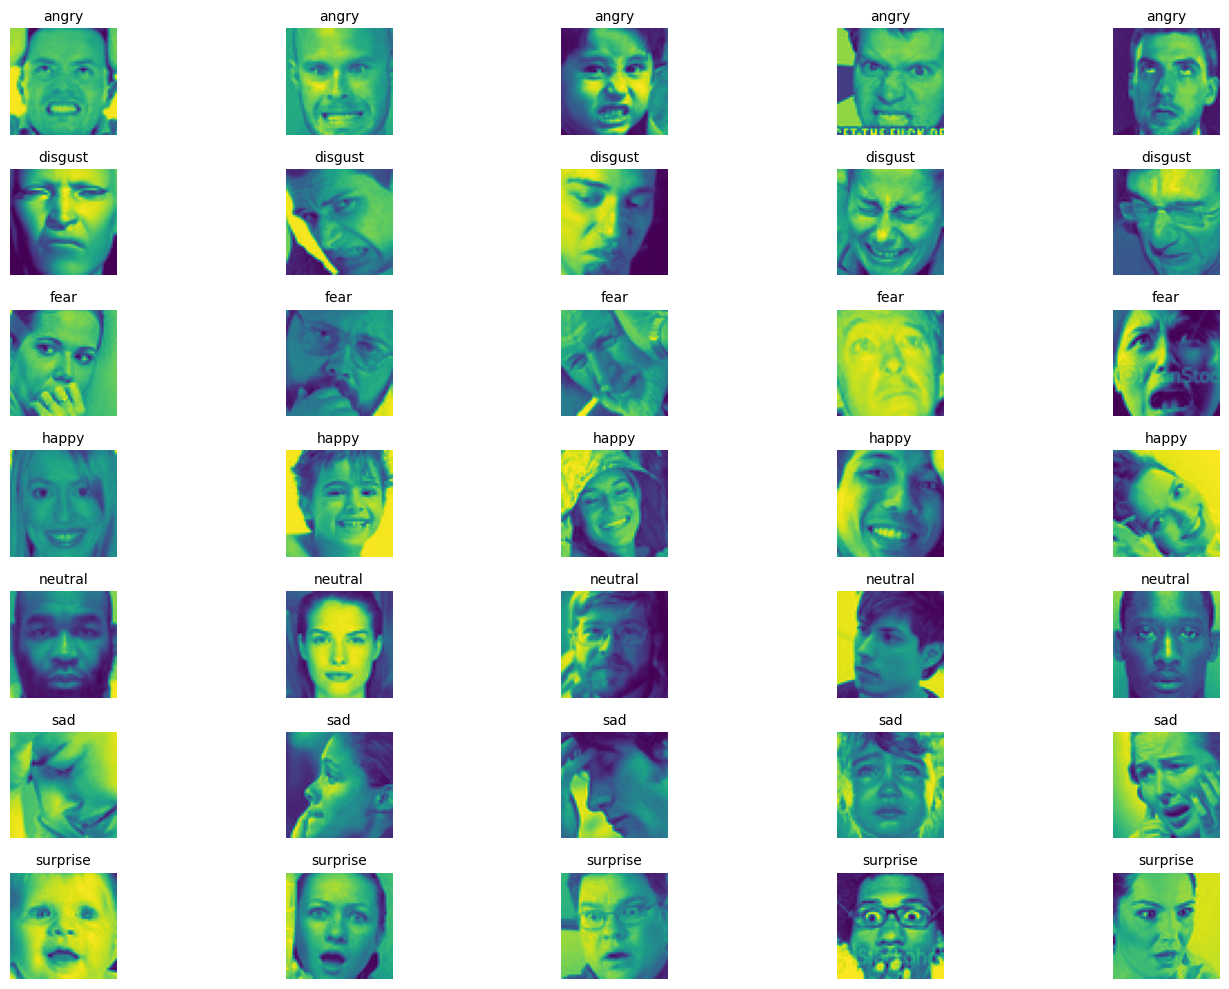

In [16]:
# Function to plot random images from each class
def plot_random_images(dataset_dir, class_distribution, n_images=5):
    plt.figure(figsize=(15, 10))
    for i, (emotion_class, _) in enumerate(class_distribution.items()):
        class_dir = os.path.join(dataset_dir, emotion_class)
        images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith(('.jpg', '.png'))]
        for j in range(n_images):
            img_path = random.choice(images)
            img = Image.open(img_path)
            plt.subplot(len(class_distribution), n_images, i * n_images + j + 1)
            plt.imshow(img)
            plt.axis('off')
            # Display the emotion class label together with the image
            plt.title(emotion_class, fontsize=10)
    plt.tight_layout()
    plt.show()

# Example usage
plot_random_images(dataset_dir, class_distribution)

In [17]:
import os
import imagehash
from PIL import Image
from collections import defaultdict

# Function to find duplicate images
def find_duplicate_images(dataset_dir):
    image_hashes = defaultdict(list)
    
    # Walk through dataset directory
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(root, file)
                try:
                    img = Image.open(image_path)
                    # Calculate image hash
                    img_hash = imagehash.average_hash(img)
                    image_hashes[img_hash].append(image_path)
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")
    
    # Find duplicates (hashes with more than one image)
    duplicates = {hash_value: paths for hash_value, paths in image_hashes.items() if len(paths) > 1}
    
    return duplicates

# Find duplicates
duplicates = find_duplicate_images(dataset_dir)

# Print duplicates
if duplicates:
    print("Found duplicate images:")
    for hash_value, paths in duplicates.items():
        print(f"Hash: {hash_value}")
        for path in paths:
            print(f" - {path}")
else:
    print("No duplicate images found.")


Found duplicate images:
Hash: 3c7cccf87c6c2834
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train\angry\0.jpg
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train\angry\Training_1426440.jpg
Hash: 3c3c1c3e7e7e7c38
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train\angry\10002.jpg
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train\angry\233.jpg
Hash: 2f06feff7f37331e
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train\angry\1170.jpg
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train\angry\Training_94891631.jpg
Hash: 1c103fcfdf0f041c
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train\angry\184.jpg
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train\angry\Training_95428981.jpg
Hash: 3e3e1e3e7e3e3c18
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\

In [18]:
import os
import imagehash
from PIL import Image
from collections import defaultdict

# Function to find and remove duplicate images
def remove_duplicate_images(dataset_dir):
    image_hashes = defaultdict(list)
    
    # Walk through dataset directory
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(root, file)
                try:
                    img = Image.open(image_path)
                    # Calculate image hash
                    img_hash = imagehash.average_hash(img)
                    image_hashes[img_hash].append(image_path)
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")
    
    # Remove duplicates (keep one and delete others)
    duplicates_removed = 0
    for hash_value, paths in image_hashes.items():
        if len(paths) > 1:
            # Keep the first image, remove the rest
            for duplicate_path in paths[1:]:
                try:
                    os.remove(duplicate_path)
                    duplicates_removed += 1
                    print(f"Removed duplicate: {duplicate_path}")
                except Exception as e:
                    print(f"Error removing {duplicate_path}: {e}")
    
    print(f"Total duplicates removed: {duplicates_removed}")

# Remove duplicates
remove_duplicate_images(dataset_dir)


Removed duplicate: C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train\angry\Training_1426440.jpg
Removed duplicate: C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train\angry\233.jpg
Removed duplicate: C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train\angry\Training_94891631.jpg
Removed duplicate: C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train\angry\Training_95428981.jpg
Removed duplicate: C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train\angry\Training_98571389.jpg
Removed duplicate: C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train\angry\Training_99204044.jpg
Removed duplicate: C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train\angry\Training_99393166.jpg
Removed duplicate: C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\cleaned\datasets\train\angry\Training_1951293.jpg
Removed 

No remaining duplicate images found.


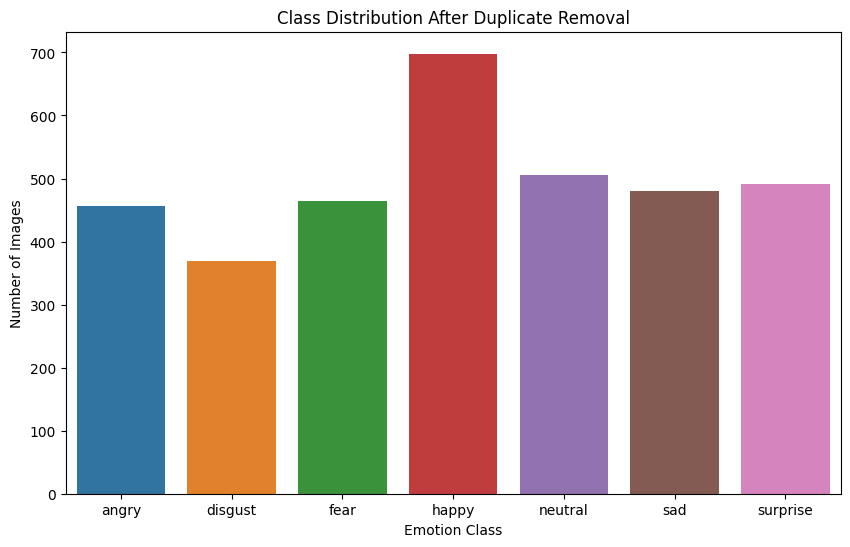

Total images after duplicate removal: 3466
Class distribution: Counter({'happy': 698, 'neutral': 506, 'surprise': 492, 'sad': 481, 'fear': 464, 'angry': 456, 'disgust': 369})


In [19]:
import os
import imagehash
from PIL import Image
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Function to find duplicate images
def find_duplicate_images(dataset_dir):
    image_hashes = defaultdict(list)
    
    # Walk through dataset directory
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(root, file)
                try:
                    img = Image.open(image_path)
                    # Calculate image hash
                    img_hash = imagehash.average_hash(img)
                    image_hashes[img_hash].append(image_path)
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")
    
    # Find duplicates (hashes with more than one image)
    duplicates = {hash_value: paths for hash_value, paths in image_hashes.items() if len(paths) > 1}
    
    return duplicates

# Function to recheck dataset statistics
def recheck_dataset_statistics(dataset_dir):
    image_classes = []
    
    # Count images per class
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.jpg', '.png', '.jpeg')):
                label = os.path.basename(root)  # Assuming folder name is the class label
                image_classes.append(label)
    
    class_distribution = Counter(image_classes)
    
    # Plotting class distribution after duplicate removal
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
    plt.title('Class Distribution After Duplicate Removal')
    plt.xlabel('Emotion Class')
    plt.ylabel('Number of Images')
    plt.show()
    
    print(f"Total images after duplicate removal: {sum(class_distribution.values())}")
    print("Class distribution:", class_distribution)

# Step 1: Check for remaining duplicates
duplicates = find_duplicate_images(dataset_dir)

if duplicates:
    print("Remaining duplicate images found:")
    for hash_value, paths in duplicates.items():
        print(f"Hash: {hash_value}")
        for path in paths:
            print(f" - {path}")
else:
    print("No remaining duplicate images found.")

# Step 2: Recheck dataset statistics
recheck_dataset_statistics(dataset_dir)
